In [254]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [255]:
data = pd.read_excel('janus2.xlsx')

In [256]:
X = data[['a atomic no','b atomic no','c atomic no','a density','b density','c density','lattice parameter (ang)','e pbe']]
y = data[['e hse']]

In [257]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
y = y.values.ravel()

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [259]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=46)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=46)

In [260]:
joblib.dump(regressor, 'randomforestmodel.pkl')

['randomforestmodel.pkl']

In [261]:
predictions = regressor.predict(X_test)

verifying model

Mean squared error for testing set: 0.048422482865378196
Root Mean Squared Error (RMSE): 0.22005109148872268
R 2 score : 0.9763195592350039


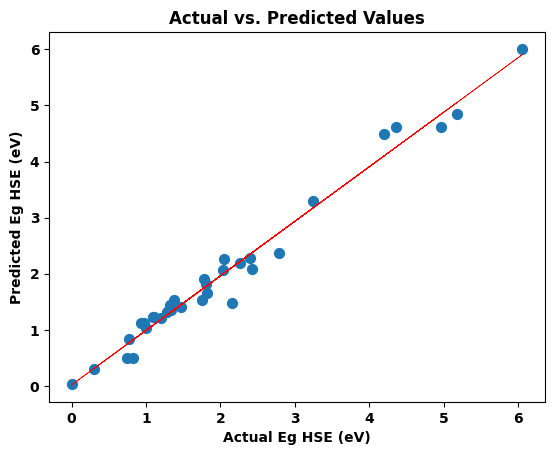

In [262]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean squared error for testing set: {mse}")

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"R 2 score : {r2}")

import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, marker= 'o',s= 50, linewidths=1.0)
plt.xlabel("Actual Eg HSE (eV)",weight='bold')
plt.ylabel("Predicted Eg HSE (eV)",weight='bold')
plt.title("Actual vs. Predicted Values",weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
fit = np.polyfit(y_test, predictions, deg=1)
plt.plot(y_test, fit[0] * y_test + fit[1], color='red', linewidth=0.5)
plt.savefig('hse.png',dpi=400)
plt.show()


predicting new data

In [263]:
new_data = pd.DataFrame({
    'a atomic no':[83],
    'b atomic no':[53],
    'c atomic no':[52],
    'a density':[9780],
    'b density':[4940],
    'c density':[6240],
    'lattice parameter (ang)':[4.42],
    'e pbe':[0.41]
})
predictions = regressor.predict(new_data)
print(predictions)

[1.1268]
